In [1]:
!python --version

Python 3.11.9


In [2]:
!cat requirements.txt

tensorflow
matplotlib
tensorflow-datasets
ipywidgets

In [3]:
!pip install -r requirements.txt > /dev/null

In [4]:
!pip list

Package                      Version
---------------------------- --------------
absl-py                      2.1.0
anyio                        4.4.0
argon2-cffi                  23.1.0
argon2-cffi-bindings         21.2.0
array_record                 0.5.1
arrow                        1.3.0
asttokens                    2.4.1
astunparse                   1.6.3
async-lru                    2.0.4
attrs                        23.2.0
Babel                        2.15.0
beautifulsoup4               4.12.3
bleach                       6.1.0
certifi                      2024.6.2
cffi                         1.16.0
charset-normalizer           3.3.2
click                        8.1.7
comm                         0.2.2
contourpy                    1.2.1
cycler                       0.12.1
debugpy                      1.8.1
decorator                    5.1.1
defusedxml                   0.7.1
dm-tree                      0.1.8
docstring_parser             0.16
etils                        1.9.0


In [7]:
import tensorflow as tf 
import tensorflow_datasets as tfds 
from matplotlib import pyplot as plt

#IF USING GPU, LIMIT THE TOTAL MEMORY USUAGE
# gpus = tf.config.experimental.list_physical_devices('GPU')
# for gpu in gpus:
#     tf.config.experimental.set_memory_growth(gpu, True)

In [8]:
 # IMPORTING DATASET- FASHION MNIST
ds = tfds.load('fashion_mnist', split='train')

2024-06-02 08:31:21.567316: W external/local_tsl/tsl/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "NOT_FOUND: Could not locate the credentials file.". Retrieving token from GCE failed with "FAILED_PRECONDITION: Error executing an HTTP request: libcurl code 6 meaning 'Couldn't resolve host name', error details: Could not resolve host: metadata.google.internal".


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/incomplete.SN04QQ_3.0.1/fashion_mnist-train.tfrecord*...:   …

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/incomplete.SN04QQ_3.0.1/fashion_mnist-test.tfrecord*...:   0…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [9]:
type(ds)

tensorflow.python.data.ops.prefetch_op._PrefetchDataset

In [13]:
# THE IMAGES WITH LABELS
ds.as_numpy_iterator().next()

2024-06-02 08:38:14.325028: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


{'image': array([[[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 18],
         [ 77],
         [227],
         [227],
         [208],
         [210],
         [225],
         [216],
         [ 85],
         [ 32],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 61],
         [100],
         [ 97],
         [ 80],
         [ 57],
         [117],
         [227],
         [238],
         [115],
         [ 49],
         [ 78],
         [106],
         [108],
         [ 71],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         

## Visualise Data :

In [15]:
import numpy as np

In [16]:
data_iterator = ds.as_numpy_iterator()

In [18]:
# FOR GETTING THE IMAGE ONE BY ONE FROM THE DATASET
data_iterator.next()

{'image': array([[[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 59],
         [ 77],
         [ 58],
         [ 56],
         [ 58],
         [ 57],
         [ 65],
         [ 89],
         [  2],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [245],
         [213],
         [199],
         [192],
         [188],
         [189],
         [184],
         [226],
         [ 90],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         

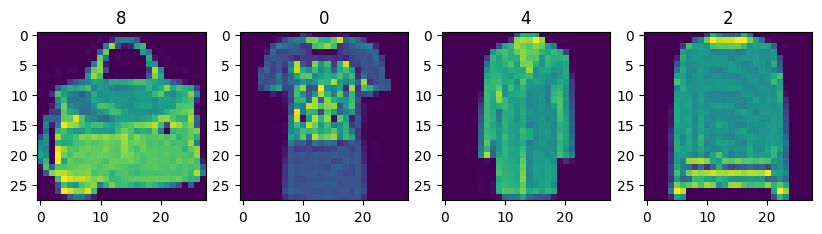

In [24]:
fig, subplot = plt.subplots(ncols=4, figsize=(10,10))
for i in range(4):
    data = data_iterator.next() # Shape: 28x28x1
    subplot[i].imshow(np.squeeze(data['image'])) # now Shape: 28x28
    subplot[i].title.set_text(data['label']) # like 1 - pants, 9 - boot

In [25]:
# IMAGE SCALEING
def scale_img(data):
    return data['image'] / 255

In [27]:
# MAP, CACHE, SHUFFLE, BATCH, PREFETCH
ds = tfds.load('fashion_mnist', split='train')
ds = ds.map(scale_img)
ds = ds.cache()
ds = ds.shuffle(60000)
ds = ds.batch(128)
ds = ds.prefetch(64)

In [28]:
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)